# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

##Business Context
The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

##Objective
The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

 

1.   Do the users spend more time on the new landing page than on the existing landing page?
2.   Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3.   Does the converted status depend on the preferred language?
4.   Is the time spent on the new page the same for the different language users?
 

##Data Dictionary
The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1.  user_id - Unique user ID of the person visiting the website
2.  group - Whether the user belongs to the first group (control) or the second  group (treatment)
3.  landing_page - Whether the landing page is new or old
4.  time_spent_on_the_page - Time (in minutes) spent by the user on the landing page
5.  converted - Whether the user gets converted to a subscriber of the news portal or not
6.  language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Library to help with statistical analysis
import scipy.stats as stats 

## Reading the Data into a DataFrame

In [2]:
# read the data
data = pd.read_csv('abtest.csv')
df=data.copy()

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [3]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [6]:
print('There are',df.shape[0],'Rows, and', df.shape[1], 'columns') #.Shape[0] give us the rows and shape[1] the columns

There are 100 Rows, and 6 columns


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


In [8]:
pd.DataFrame({'Count': df.isnull().sum()})

,Count
user_id,0
group,0
landing_page,0
time_spent_on_the_page,0
converted,0
language_preferred,0


In [9]:
duplicates=df.duplicated().sum()
duplicates

0

#### Observations:

- There are 6 columns with 100 rows and no missing values.
- There are no duplicate values.
- The column user_id is interpreted as a numerical column but is actually categorical.
- The only numerical data type is time_spent_on_the_page.
- Average time spent on the page is around 5 min 38 sec.
- Min time spent on the page is 19 sec
- Max time spent on the page is 10 min 71 sec


### Univariate Analysis

In [10]:
df['user_id'].nunique()

100

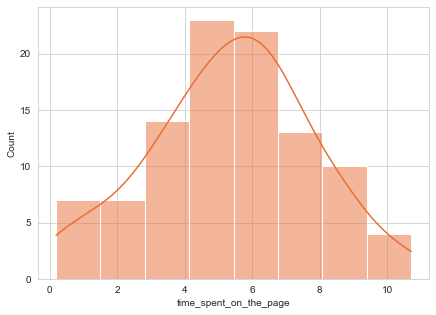

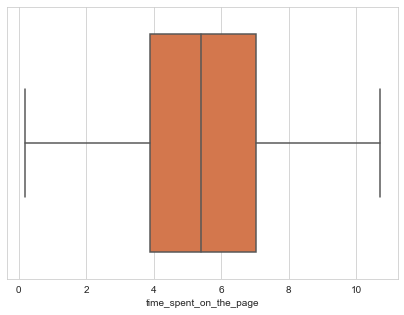

In [11]:
sns.set_style("whitegrid")
plt.figure(figsize = (7,5))          
sns.set_palette("icefire_r")
sns.histplot(data=df,x='time_spent_on_the_page',kde=True)
plt.show()
plt.figure(figsize = (7,5)) 
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()

### Observations

- According to the graphs, time spent on the page apparently follows a normal distribution.
- 75% of the users spent between 2 and 8 min on the page.
- Maximum time spent on the page is a little bit more than 10 min.

In [12]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

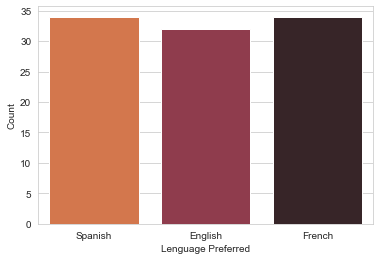

In [13]:
sns.color_palette("icefire_r")
sns.countplot(data=df, x='language_preferred')
plt.xlabel('Lenguage Preferred')
plt.ylabel('Count');

#### Observations:
- The two most preferred languages are French and Spanish. 
- The graph shows there is a small difference between the user's language preference (English, Spanish and French).

In [14]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

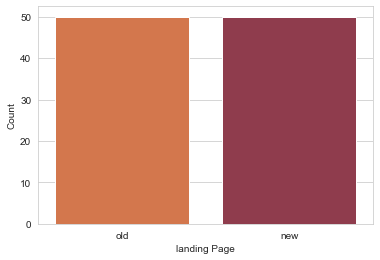

In [15]:
sns.color_palette("icefire_r")
sns.countplot(data=df, x='landing_page')
plt.xlabel('landing Page')
plt.ylabel('Count');

### Obsevations:
- There is an equal quantity of users on the old and the new landing page. 

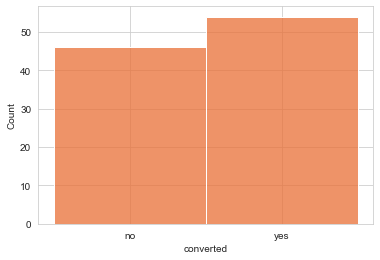

In [16]:
sns.color_palette("icefire_r")
df['converted'].value_counts()
sns.histplot(data=df, x='converted');

In [17]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

### Obsevations:
- Overall 54 users  of 100 were converted into subscribers.

### Bivariate Analysis

#### Converted vs Time spent on the page

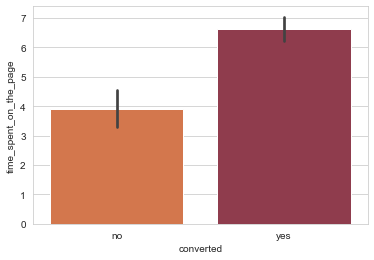

In [18]:
sns.color_palette("icefire_r")
sns.barplot(data=df, x='converted',y='time_spent_on_the_page');
plt.show()


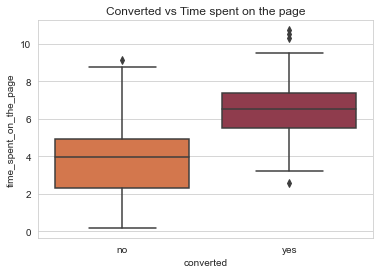

In [19]:
sns.color_palette("icefire_r")
sns.boxplot(data=df, x='converted',y='time_spent_on_the_page')
plt.title('Converted vs Time spent on the page')
plt.show()

### Obsevations:
- The range of time spent on the page for people converted lies between 3 and 10 min.
- While 75% of the not converted users spent less than 5 min on the page. 
- This leads us to infer the more time people spend on the page the more likely they are to subscribe.

#### Group Vs Time Spent

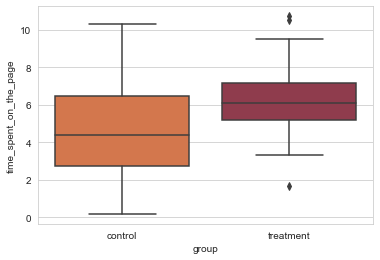

In [20]:
sns.color_palette("icefire_r")
sns.boxplot(data=df, x='group',y='time_spent_on_the_page');

#### Landing Page Vs Time Spent

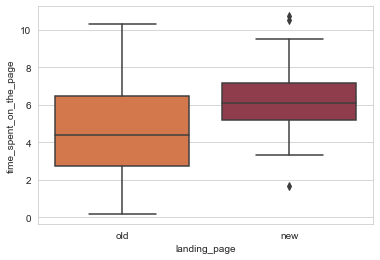

In [21]:
sns.color_palette("icefire_r")
sns.boxplot(data=df, x='landing_page',y='time_spent_on_the_page');

### Observations:

- Users on the new landing page(Group Treatment) spent more time than users on the old landing page(Group Control).
- Users on the old landing page have a lower and dispersed range of time spent. With a min of 20 seconds and 75% of the users spent less than 7.5 min and max of 10.3 min.
 - while user's time on the new landing page is higher and less dispersed, users on the new landing page spent a nearly a minimum of 3 minutes and max of 10.7 minutes.


#### Time spent vs Landing page vs Converted

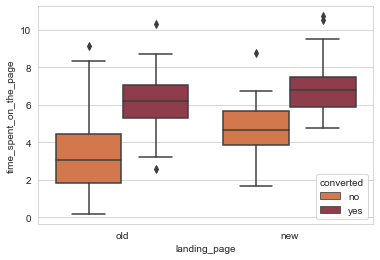

In [22]:
sns.color_palette("icefire_r")
sns.boxplot(data=df, x='landing_page',y='time_spent_on_the_page',hue='converted');

### Observations:
- We can see that users that became subscribers spent more time on the websites in both of the landing pages(new and old).
- Also users on the new website spent more time than users on the old one.

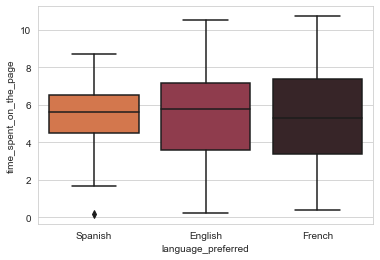

In [23]:
sns.color_palette("icefire_r")
sns.boxplot(data=df, x='language_preferred',y='time_spent_on_the_page');

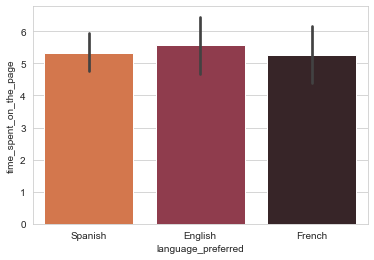

In [24]:
sns.color_palette("icefire_r")
sns.barplot(data=df, x='language_preferred',y='time_spent_on_the_page');

### Observations:

- Average time for Spanish, English and French are pretty close to each other, no more than a min of difference.
- English appears to have the highest mean time followed by Spanish and then French has the lowest mean time. 

<Figure size 360x216 with 0 Axes>

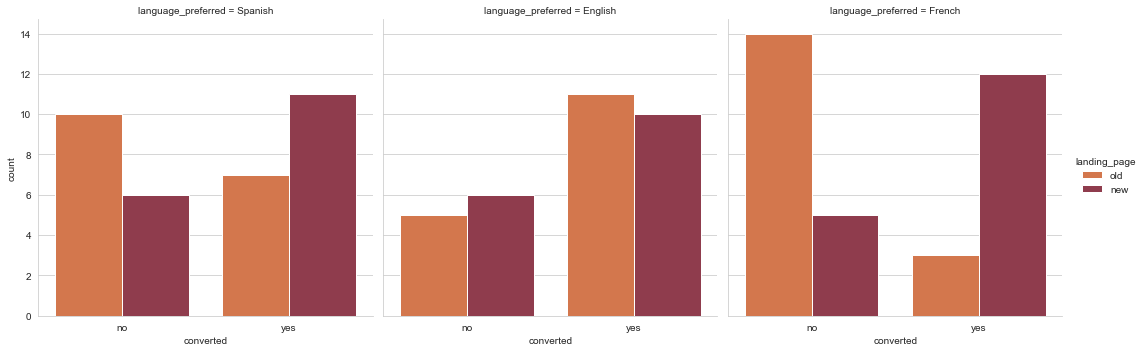

In [25]:
plt.figure(figsize = (5,3));
sns.catplot(hue = 'landing_page', data = df, kind = 'count', col = 'language_preferred', x = 'converted');
plt.show();


### Observations:
- Overall, French has the higher number of rejections with 14 users, but also the highest conversion on the new landing page, 12 users became subscriptors.
-Users that prefer English have almost the same quantity of conversions in old(11 users) and new landing(10 users).
-Users that prefer Spanish have a large number of conversions on the new landing page, while the users on the old landing page tend to be higher in rejections.


## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

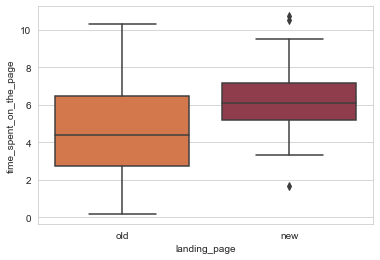

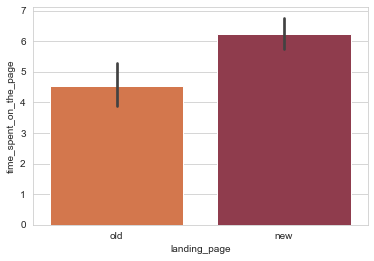

In [26]:
sns.color_palette("icefire_r")
sns.boxplot(data=df, x='landing_page',y='time_spent_on_the_page');
plt.show()
sns.barplot(data=df, x='landing_page',y='time_spent_on_the_page');
plt.show()

### Step 1: Define the null and alternate hypotheses


*   𝜇1= Time spent on the new landing page
*   𝜇2= Time spent on the old landing page



Null hypothesis

𝐻0:𝜇1<=𝜇2

Alternative hypothesis

𝐻a:𝜇1>𝜇2

### Step 2: Select Appropriate test
Two Independent Sample T-test 

### Step 3: Decide the significance level
α=0.05 

### Step 4: Collect and prepare data

In [27]:
new_landing= df[df['landing_page'] == 'new'].reset_index()
old_landing=df[df['landing_page'] == 'old'].reset_index()

In [28]:
# find the sample means and sample standard deviations for the two samples
print('The mean spent time on the new landing page is ' + str(new_landing['time_spent_on_the_page'].mean()))
print('The mean spent time on the old landing page is ' + str(old_landing['time_spent_on_the_page'].mean()))
print('The standard deviation of the new landing page is ' + str(round(new_landing['time_spent_on_the_page'].std(), 2)))
print('The standard deviation of the old landing page is ' + str(round(old_landing['time_spent_on_the_page'].std(), 2)))

The mean spent time on the new landing page is 6.2232
The mean spent time on the old landing page is 4.532400000000001
The standard deviation of the new landing page is 1.82
The standard deviation of the old landing page is 2.58


### Two Independent Sample T-test assumptions are satisfied or not
- Continuous data = Yes, time is mesured on a continuous scale.

- Normally distributed populations = Yes

- Independent populations = We are informed that the two samples are independent from each other.

- Unequal population standard deviations = yes.

- Random sampling from the population = Yes, we are informed that the collected sample is a simple random sample.

- We can use the Two Independent Sample T-test

### Step 5: Calculate the p-value

In [29]:
from scipy.stats import ttest_ind
test_stat, p_value = ttest_ind(new_landing['time_spent_on_the_page'], old_landing['time_spent_on_the_page'], 
                               equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [30]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

- Based on the sample and our p-value(0.000139), which is much less than the level of significance we can reject the null hypothesis.
- Hence, we have enough evidence to support the claim that the mean time spent on the new landing page is more than the mean time spent on the old landing page.

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

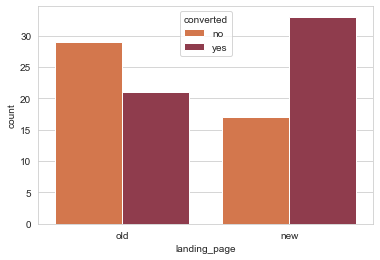

In [31]:

sns.countplot(data=df, x='landing_page',hue='converted');
plt.show()


### Step 1: Define the null and alternate hypotheses


p1= Proportion of users that visit the new landing, 

p2= Proportion of users that visit the old landing 

Null hypothesis
*   H0: p1 = p2

Alternative hypothesis
*   Ha: p1 > p2

### Step 2: Select Appropriate test
2-propotion Z-test since we are comparing the sample proportions from two populations.

### Step 3: Decide the significance level
α=0.05 

### Step 4: Colect and prepare the data

In [32]:
convertion_new=df[(df['landing_page'] == 'new')&(df['converted']=='yes')].reset_index()
convertion_old=df[(df['landing_page'] == 'old')&(df['converted']=='yes')].reset_index()
print('P1:',convertion_new.shape[0])
print('P2:',convertion_old.shape[0])
print('Proportion converted for new landing page:', convertion_new.shape[0]/new_landing.shape[0])
print('Proportion converted for the old landing page:',convertion_old.shape[0]/old_landing.shape[0])

P1: 33
P2: 21
Proportion converted for new landing page: 0.66
Proportion converted for the old landing page: 0.42


### Two propotion Z-test assumptions are satisfied or not- Binomially distributed populations
- Binomially distributed populations: yes, its either converted or not.
- Independent populations; yes
- Random sampling from the populations: yes
- When both mean (np) and
n(1-p) are greater than or equal to 10, the binomial distribution can be approximated by a normal distribution: yes

>$np_1 = 50\cdot \frac{33}{50} =33 \geq 10\\  
n(1-p_1) = 50 \cdot \frac{50-33}{50} =17 \geq 10 \\    
np_2 = 50\cdot \frac{21}{50} =21 \geq 10\\ 
n(1-p_2) = 50 \cdot \frac{50-21}{50} =29 \geq 10 $ 

### Step 5: Calculate the p-value

In [33]:
from statsmodels.stats.proportion import proportions_ztest
conv_count = np.array([33,21]) # converted users in new and old landing pages
nobs = np.array([50,50])       #  number of observations in new and old landing pages

# this test returns 2 values, test statistic and p-value
test_stat, p_value = proportions_ztest(conv_count, nobs, alternative = 'larger') # Ha as larger
print('p-value : ', p_value)


p-value :  0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [34]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference
- As the p-value is less(0.008026) than the significance level (0.05), we can reject the null hypothesis.
- Thus, we have enough evidence to conclude that the proportion of conversion rate for the new page is greater than the proportion of conversion rate for the old page.

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

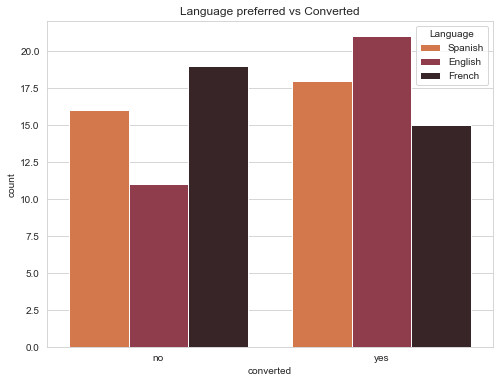

In [35]:
plt.figure(figsize=(8,6))
sns.countplot(hue = 'language_preferred', data = data, x = 'converted')
plt.title('Language preferred vs Converted')
plt.legend(title = 'Language')
plt.show()

### Step 1: Define the null and alternate hypotheses

Ho : Converted status is independent of language preferred

Ha : Converted status depends on language preferred

### Step 2: Select Appropriate test
Chi-Square Test of Independence

### Step 3: Decide the significance level
α=0.05 

### Step 4: Colect and prepare the data

In [36]:
lang_conv = pd.crosstab(df['converted'], df['language_preferred'])
lang_conv

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Satisfied Chi-Square Test of Independence Assumptions:
- Categorical variables: Yes

- Expected value of the number of sample observations in each level of the variable is at least 5: Yes

- Random sampling from the population: Yes

### Step 5: Calculate the p-value

In [37]:
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(lang_conv)
print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

In [38]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

- As the p-value (0.213) is greater than the level of significance (0.05), we fail to reject the null hypothesis.
- Hence, we do not have enough statistical evidence to conclude that the conversion status depends on language preference.

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

In [39]:
new=df[(df['landing_page']=='new')]
new
time=new.groupby('language_preferred').agg({'time_spent_on_the_page':['mean']})
print(time)
print(df.groupby('language_preferred').agg({'time_spent_on_the_page':['mean']}))

                   time_spent_on_the_page
                                     mean
language_preferred                       
English                          6.663750
French                           6.196471
Spanish                          5.835294
                   time_spent_on_the_page
                                     mean
language_preferred                       
English                          5.559062
French                           5.253235
Spanish                          5.331765


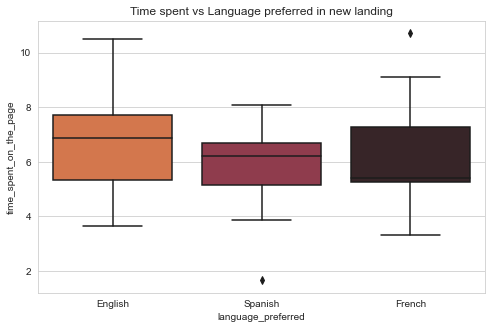

In [40]:
plt.figure(figsize=(8,5))
sns.boxplot(data=new_landing, x='language_preferred', y='time_spent_on_the_page')
plt.title('Time spent vs Language preferred in new landing');

### Step 1: Define the null and alternate hypotheses

- Null hypothesis

Ho : All the mean time spent are equal for each language

- Alternative hypothesis

Ha : Atleast one of the mean time spent is different from the rest

### Step 2: Select Appropriate test
One-way ANOVA test because we are trying to determine if the means of more than two independent populations are significantly different.

### Step 3: Decide the significance level
α=0.05 

### Step 4: Colect and prepare the data

### Shapiro-Wilk’s test
- Null hypothesis

𝐻0:  Time spent follows a normal distribution 

- Alternative hypothesis

𝐻𝑎:  Time spent does not follow a normal distribution

In [41]:
# Assumption 1: Normal Distribution
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(new_landing['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


In [42]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.8040016293525696 is greater than the level of significance, we fail to reject the null hypothesis.


### Levene's Test
- Testing the null hypothesis

Ho : All the population variances are equal

- Alternative hypothesis

Ha : Atleast one variance is different from the rest

In [43]:
#Assumption 2: Homogeneity of Variance
from scipy.stats import levene

statistic, p_value = levene(new_landing['time_spent_on_the_page'][new_landing['language_preferred']=='English'],
                            new_landing['time_spent_on_the_page'][new_landing['language_preferred']== 'French'],
                            new_landing['time_spent_on_the_page'][new_landing['language_preferred']=='Spanish'])
print('p-value : ', p_value)

p-value :  0.46711357711340173


In [44]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.46711357711340173 is greater than the level of significance, we fail to reject the null hypothesis.


### Satisfied One-way ANOVA Test of Independence Assumptions:


- The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
- Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
- Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.

### Step 5: Calculate the p-value

In [45]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(new_landing.loc[new_landing['language_preferred']=='English','time_spent_on_the_page'],
                              new_landing.loc[new_landing['language_preferred']=='French','time_spent_on_the_page'],
                              new_landing.loc[new_landing['language_preferred']=='Spanish','time_spent_on_the_page'])
print('p-value : ', p_value)

p-value :  0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [46]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

- The p-value (0.4320) is greater than the significance level(0.05), so we fail to reject the null hypothesis.

- There is not enough statistcal evidence to conclude that the average time spent on the different landing pages differed by any significant amount based on the user's language (Spanish, English, and French).

## Conclusion and Business Recommendations

- From the visual and statistical analysis we can conclude about the research:


   - The average time spent by users on the new landing page is higher than the old one.
   - The Conversion rate is higher for the new landing page.
   - The Conversion status does not depend on the language preference.
   - The mean time spent on the new landing page does not differ by a significant level based on the users' language(Spanish, English and French).
  
- Based on these findings we can support that the decision of switching to the new landing page would have a positive impact in engagement and conversion rates for the business.


- It is important to keep monitoring the performance of the new landing page over time to ensure that the positive trend and behavior continues.


- If in the future, the idea of optimizing the landing page becomes a need, consider conducting additional tests to develop the idea. You can test with different content, copy, layouts, images, or more elements to evaluate if they have an impact on conversion rates or engagement metrics.


- Always keep trying different ways to personalize the user experience based on language preference. While language preference may not have a direct impact on conversion rates right now, language is related to culture and when you provide content in the user's preferred language, it may have a positive impact that can help improve engagement and satisfaction overall.


- Based on the success on the new landing page you can explore opportunities to expand into new markets or target new customers. This is worth investing in additional marketing efforts to reach new audiences.


- The business should continue to focus on optimizing the user experience to drive even better results.



___